In [1]:
## Import warnings. 
import warnings
warnings.filterwarnings("ignore") 

In [2]:
## Import analysis modules
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc

C:\Users\biltu.khawas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
## Import visualization modules
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [6]:
## Read in file
train_original = pd.read_csv('../AssignmentSolution/Titanic_Survival_data/train.csv')
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_original = pd.read_csv('../AssignmentSolution/Titanic_Survival_data/test.csv')
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Exclude some features to reduce data dimension
train=train_original.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test=test_original.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
total = [train,test]

train.shape, test.shape

((891, 8), (418, 7))

In [9]:
## Missing cases for training set
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
## Age missing cases
train[train['Age'].isnull()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


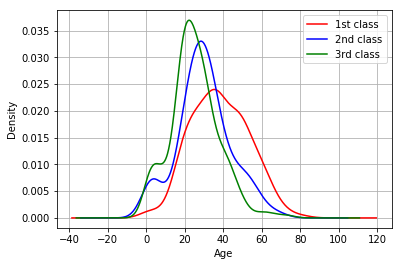

In [11]:
## Distribution of Age, condition = Pclass
train[train.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
train[train.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
train[train.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

In [12]:
## Create function to replace NaN with the median value for each ticket class
def fill_missing_age(dataset):
    for i in range(1,4):
        median_age=dataset[dataset["Pclass"]==i]["Age"].median()
        dataset["Age"]=dataset["Age"].fillna(median_age)
        return dataset

train = fill_missing_age(train)

In [13]:
## Embarked missing cases 
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


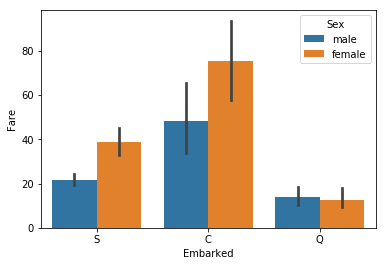

In [14]:
## Create Barplot 
sns.barplot(x="Embarked", y="Fare", hue="Sex", data=train)

In [15]:
## Replace missing cases with C
train["Embarked"] = train["Embarked"].fillna('C')

In [16]:
## Missing cases for testing set
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [17]:
## Age missing cases
test[test['Age'].isnull()].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
10,3,male,NaN,0,0,7.8958,S
22,1,female,NaN,0,0,31.6833,S
29,3,male,NaN,2,0,21.6792,C
33,3,female,NaN,1,2,23.4500,S
36,3,female,NaN,0,0,8.0500,S


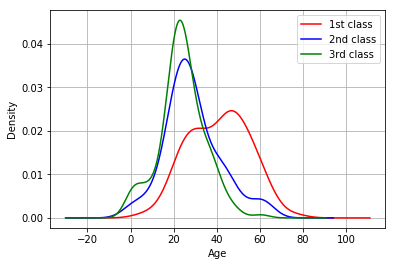

In [18]:
## Distribution of Age, condition = Pclass
test[test.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
test[test.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
test[test.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

In [19]:
## Replace missing cases with the median age for each ticket class.
test = fill_missing_age(test)

In [20]:
## Fare missing cases 
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [22]:
## Create function to replace NaN with the median fare with given conditions
def fill_missing_fare(dataset):
    median_fare=dataset[(dataset["Pclass"]==3) & (dataset["Embarked"]=="S")]["Fare"].median()
    dataset["Fare"]=dataset["Fare"].fillna(median_fare)
    return dataset

test = fill_missing_fare(test)

In [23]:
## Re-Check for missing cases
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [24]:
test.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

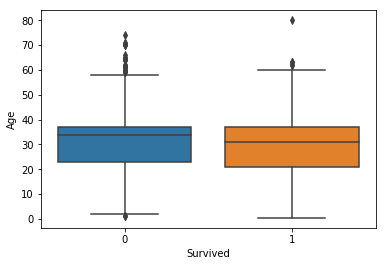

In [25]:
## Boxplot for Age
sns.boxplot(x=train["Survived"], y=train["Age"])

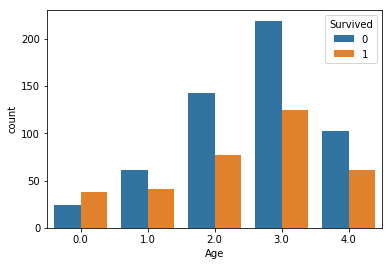

In [26]:
## discretize Age feature
for dataset in total:
    dataset.loc[dataset["Age"] <= 9, "Age"] = 0
    dataset.loc[(dataset["Age"] > 9) & (dataset["Age"] <= 19), "Age"] = 1
    dataset.loc[(dataset["Age"] > 19) & (dataset["Age"] <= 29), "Age"] = 2
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[dataset["Age"] > 39, "Age"] = 4
sns.countplot(x="Age", data=train, hue="Survived")

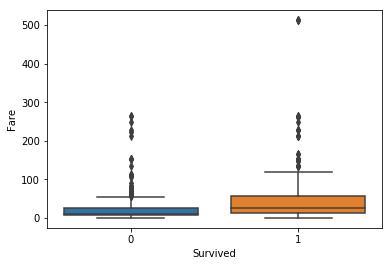

In [27]:
## Boxplot for Fare
sns.boxplot(x=train["Survived"], y=train["Fare"])

In [28]:
## discretize Fare
pd.qcut(train["Fare"], 8).value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare, dtype: int64

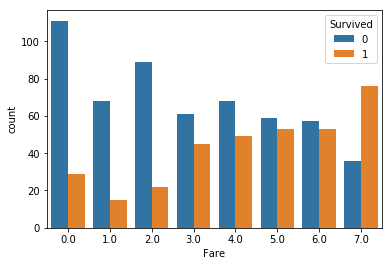

In [29]:
for dataset in total:
    dataset.loc[dataset["Fare"] <= 7.75, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.75) & (dataset["Fare"] <= 7.91), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 9.841), "Fare"] = 2
    dataset.loc[(dataset["Fare"] > 9.841) & (dataset["Fare"] <= 14.454), "Fare"] = 3   
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 24.479), "Fare"] = 4
    dataset.loc[(dataset["Fare"] >24.479) & (dataset["Fare"] <= 31), "Fare"] = 5   
    dataset.loc[(dataset["Fare"] > 31) & (dataset["Fare"] <= 69.487), "Fare"] = 6
    dataset.loc[dataset["Fare"] > 69.487, "Fare"] = 7    
    
sns.countplot(x="Fare", data=train, hue="Survived")

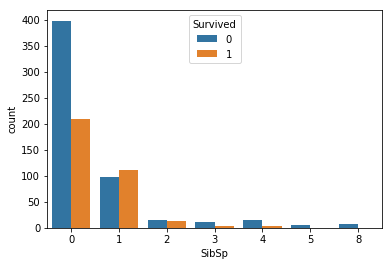

In [30]:
## Countplot for the number of siblings/spouse
sns.countplot(x="SibSp", data=train, hue="Survived")

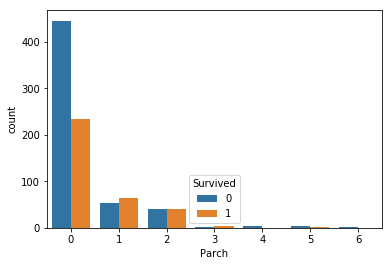

In [31]:
## Countplot for the number of parents/childrens
sns.countplot(x="Parch", data=train, hue="Survived")

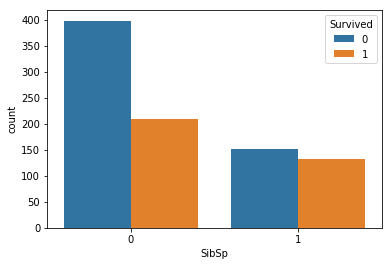

In [32]:
## Convert SibSp into binary feature
for dataset in total:
    dataset.loc[dataset["SibSp"]==0, "SibSp"]=0
    dataset.loc[dataset["SibSp"]!=0, "SibSp"]=1

sns.countplot(x="SibSp", data=train, hue="Survived")

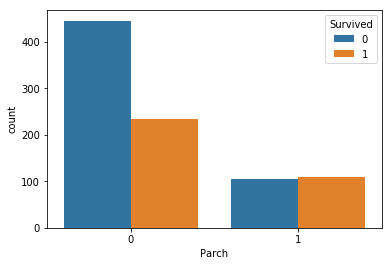

In [33]:
## Convert Parch into binary feature
for dataset in total:
    dataset.loc[dataset["Parch"]==0, "Parch"]=0
    dataset.loc[dataset["Parch"]!=0, "Parch"]=1
    
sns.countplot(x="Parch", data=train, hue="Survived")

In [34]:
## Scikit learn estimators require numeric features
sex = {'female':0,'male':1}
embarked = {'C':0,'Q':1,'S':2} 

In [35]:
## Convert categorical features to numeric using mapping function
for dataset in total:
    dataset['Sex'] = dataset['Sex'].map(sex)
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2.0,1,0,0.0,2
1,1,1,0,3.0,1,0,7.0,0
2,1,3,0,2.0,0,0,2.0,2
3,1,1,0,3.0,1,0,6.0,2
4,0,3,1,3.0,0,0,2.0,2


In [36]:
## total survival rate of train dataset
survived_cases=0
for i in range(891):
    if train.Survived[i]==1:
        survived_cases = survived_cases + 1

total_survival_rate = float(survived_cases)/float(891)

print('%0.4f' % (total_survival_rate))

0.3838


In [37]:
## Survival rate under each feature condition
def survival_rate(feature):
    rate = train[[feature, 'Survived']].groupby([feature], as_index=False).mean().sort_values(by=[feature], ascending=True)
    sns.factorplot(x=feature, y="Survived", data=rate)

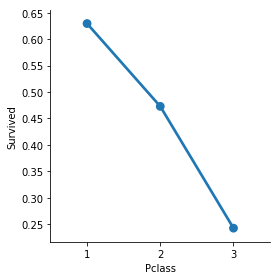

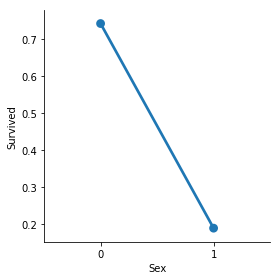

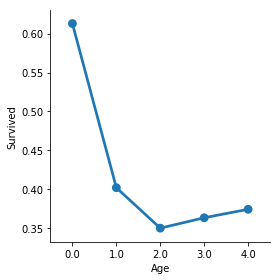

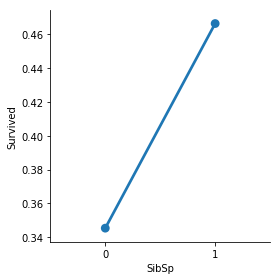

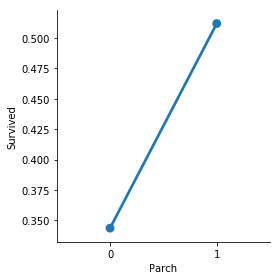

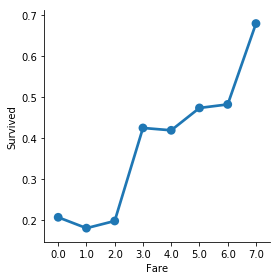

In [39]:
for feature in ["Pclass", "Sex",  "Age", "SibSp", "Parch", "Fare"]:
    survival_rate(feature)

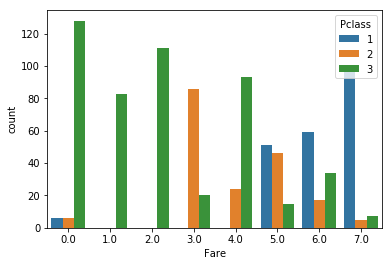

In [40]:
## Inter-relationship between Fare and Pclass
sns.countplot(x="Fare", data=train, hue="Pclass")

In [41]:
## Seperate input features from target feature
x = train.drop("Survived", axis=1)
y = train["Survived"]

In [42]:
## Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)

In [43]:
## Take a look at the shape
x_train.shape, y_train.shape

((668, 7), (668,))

In [44]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1)

In [45]:
## Run 10 fold cross validation
cvs = cross_val_score(clf,x,y,cv=5)
print(cvs)

[0.79329609 0.77653631 0.83146067 0.80337079 0.84180791]


In [46]:
## Show cross validation score mean and std
print("Accuracy: %0.4f (+/- %0.4f)" % (cvs.mean(), cvs.std()*2))

Accuracy: 0.8093 (+/- 0.0483)


In [47]:
## Fit the model with data
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [48]:
## Accuracy
acc_decision_tree = round(clf.score(x_train, y_train), 4)
print("Accuracy: %0.4f" % (acc_decision_tree))

Accuracy: 0.9027


In [49]:
## Predict y given validation set
predictions = clf.predict(x_test)

In [50]:
## Take a look at the confusion matrix ([TN,FN],[FP,TP])
confusion_matrix(y_test,predictions)

array([[115,  13],
       [ 34,  61]], dtype=int64)

In [51]:
## Precision
print("Precision: %0.4f" % precision_score(y_test, predictions))

Precision: 0.8243


In [52]:
## Recall score
print("Recall: %0.4f" % recall_score(y_test, predictions))

Recall: 0.6421


In [53]:
## Print classification report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.77      0.90      0.83       128
          1       0.82      0.64      0.72        95

avg / total       0.79      0.79      0.78       223



In [54]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, predictions)
roc_auc = auc(fp, tp)

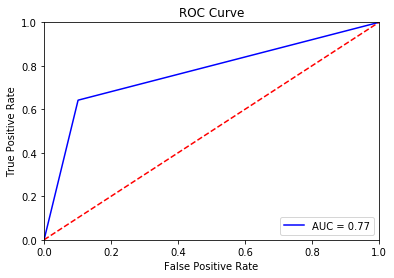

In [55]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()